In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
data=load_wine()
X=data.data
y=data.target

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [4]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [5]:
lda=LDA()
lda.fit(X_train_std, y_train)
y_pred_lda=lda.predict(X_test_std)


In [6]:
acc_lda=accuracy_score(y_test,y_pred_lda)
prec_lda=precision_score(y_test,y_pred_lda,average='weighted')
rec_lda=recall_score(y_test,y_pred_lda,average='weighted')
cm_lda=confusion_matrix(y_test, y_pred_lda)

In [7]:
print("LDA performance")
print("accuracy",acc_lda)
print("precision",prec_lda)
print("recall:",rec_lda)
print("confusionmatrix",cm_lda)

LDA performance
accuracy 1.0
precision 1.0
recall: 1.0
confusionmatrix [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [8]:
lr=LR(max_iter=1000)
lr.fit(X_train_std, y_train)
y_pred_lr=lr.predict(X_test_std)

In [9]:
acc_lr=accuracy_score(y_test,y_pred_lr)
prec_lr=precision_score(y_test, y_pred_lr,average='weighted')
rec_lr=recall_score(y_test,y_pred_lr,average='weighted')
cm_lr=confusion_matrix(y_test,y_pred_lr)

In [10]:
print("logistic regression")
print("accuracy",acc_lr)
print("precision",prec_lr)
print("recall",rec_lr)
print("confusionmatrix",cm_lr)


logistic regression
accuracy 0.9814814814814815
precision 0.982716049382716
recall 0.9814814814814815
confusionmatrix [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [11]:
lda_2d=LDA(n_components=2)
X_train_2d=lda_2d.fit_transform(X_train_std,y_train)
X_test_2d=lda_2d.transform(X_test_std)

In [13]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

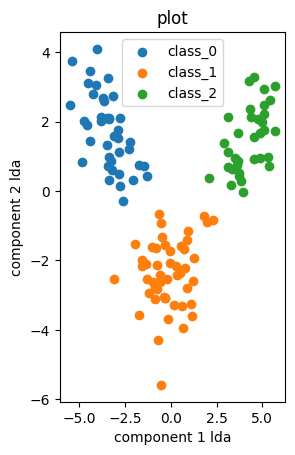

In [21]:
plt.subplot(1,2,1)
for i, label in enumerate(data.target_names):
    plt.scatter(X_train_2d[y_train==i,0],X_train_2d[y_train==i,1],label=label)
plt.xlabel("component 1 lda")
plt.ylabel("component 2 lda")
plt.title("plot")
plt.legend()


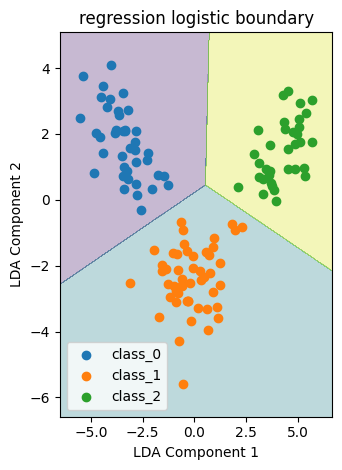

In [19]:
plt.subplot(1, 2, 2)
lr_2d = LR(max_iter=1000)
lr_2d.fit(X_train_2d, y_train)
x_min,x_max=X_train_2d[:,0].min()-1,X_train_2d[:,0].max()+1
y_min,y_max=X_train_2d[:,1].min()-1,X_train_2d[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z=lr_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
for i, label in enumerate(data.target_names):
    plt.scatter(X_train_2d[y_train==i,0],X_train_2d[y_train==i,1],label=label)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("regression logistic boundary")
plt.legend()
plt.tight_layout()
plt.show()